<a href="https://colab.research.google.com/github/tayanarapaiva/PIM/blob/main/ATV_BALL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.filters import (threshold_otsu, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte
from skimage.filters import threshold_otsu


In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


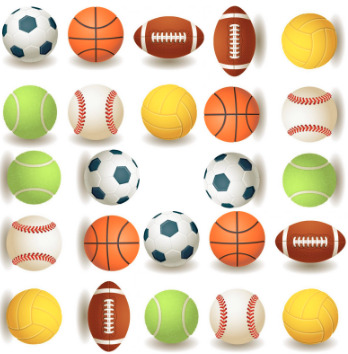

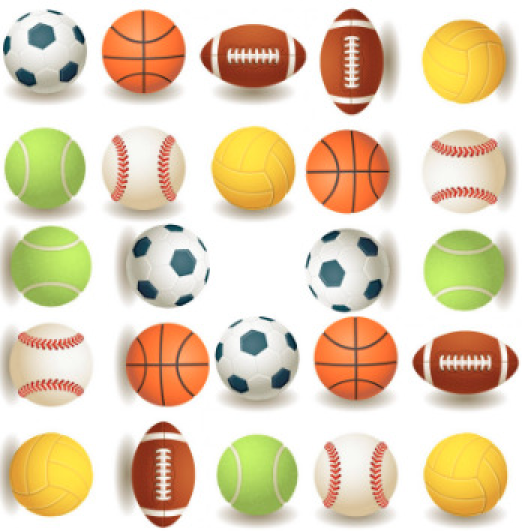

In [95]:

img1 = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/bolas_sombra.jpeg')
cv2_imshow(img1)

img1 = cv2.resize(img1, (int(img1.shape[1]*1.5),int(img1.shape[0]*1.5)), interpolation = cv2.INTER_AREA)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
cv2_imshow(img1)
def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""
    #implementar: se a imagem tiver uma única camada, copiá-la 3x para plotar


    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title,fontsize=25,fontweight='bold')
    plt.axis('off')


(1, 20, 3)


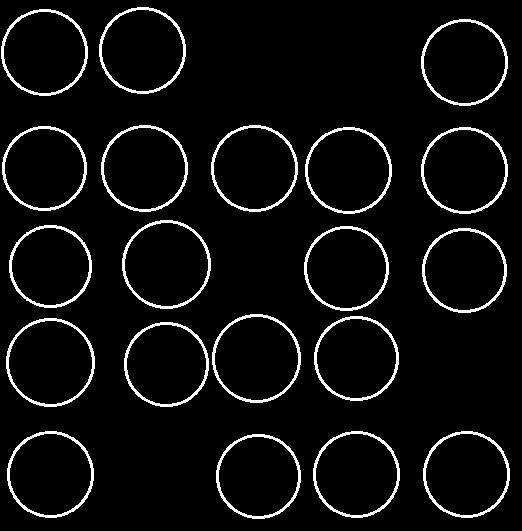

In [96]:
#Construção da máscara de círculos
mask_circ = np.zeros((int(img1.shape[0]),int(img1.shape[1])), dtype=np.uint8)
#cv2_imshow(mask_circ)

#Detecção de círculos
detected_circles = cv2.HoughCircles(img_blur1,
                   cv2.HOUGH_GRADIENT, 1, minDist = 50, param1 = 50,
                   param2 = 30, minRadius = 40, maxRadius = 45)
if detected_circles is not None:

    detected_circles = np.uint16(np.around(detected_circles))
    print(detected_circles.shape)

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(mask_circ, (a, b), r, (255, 255, 255), 2)


    cv2_imshow(mask_circ)

(531, 522)
(533, 524)


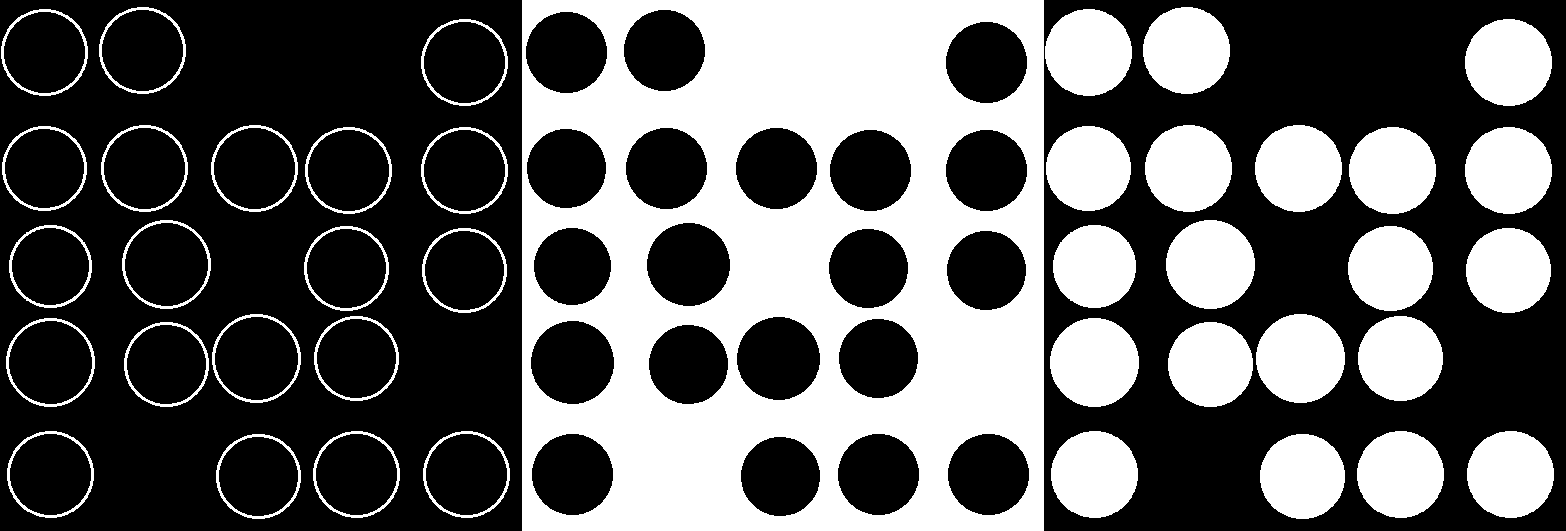

(531, 522)
(531, 522, 3)


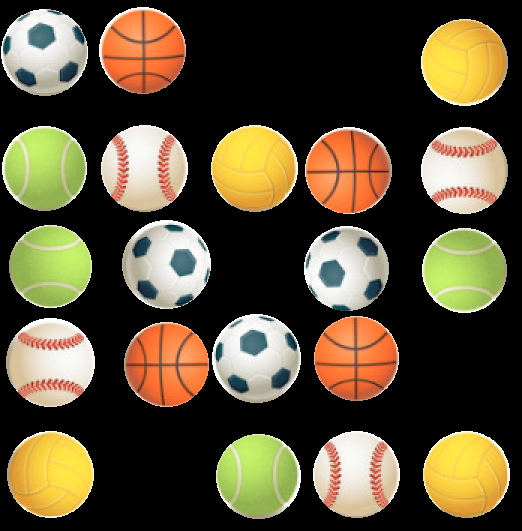

In [97]:
#Preenchimento dos círculos

im_th = mask_circ

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.

#th, im_th = cv2.threshold(im_in, 247, 255, cv2.THRESH_BINARY_INV);

# Copy the thresholded image.
im_floodfill = im_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

print(im_floodfill.shape)
print(mask.shape)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
mask_circ_ok = im_th | im_floodfill_inv

# Display images.
cv2_imshow(np.hstack([im_th,im_floodfill, mask_circ_ok]))

print(mask_circ_ok.shape)
print(img1.shape)
#Aplicação da máscara de círculos

img_out_res2 = cv2.bitwise_and(img1, img1, mask= mask_circ_ok)
cv2_imshow(img_out_res2)

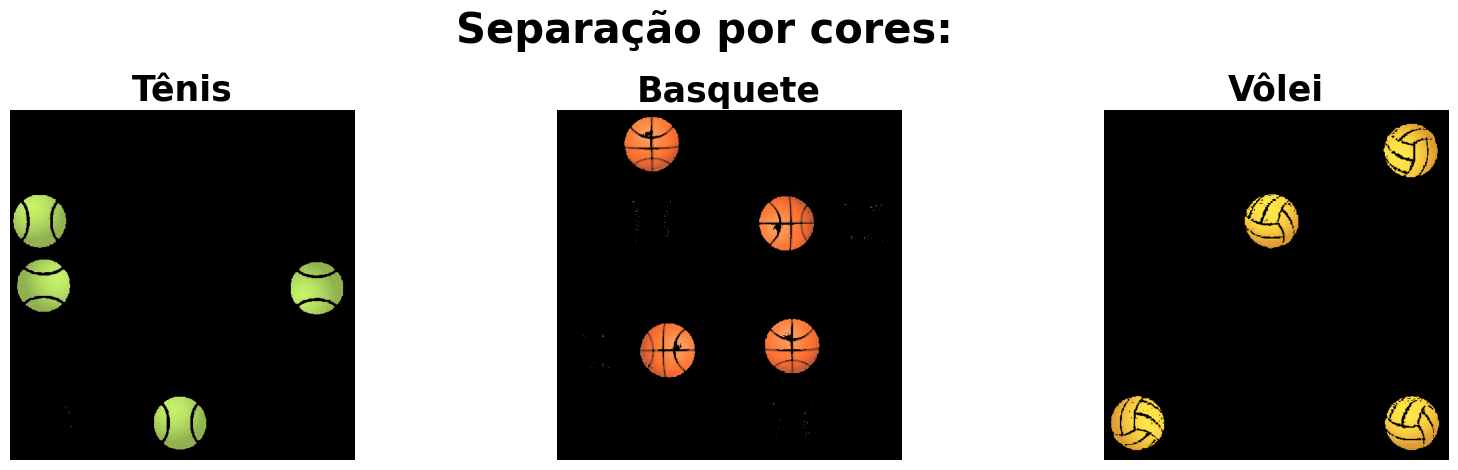

máscaras pela separação por cores


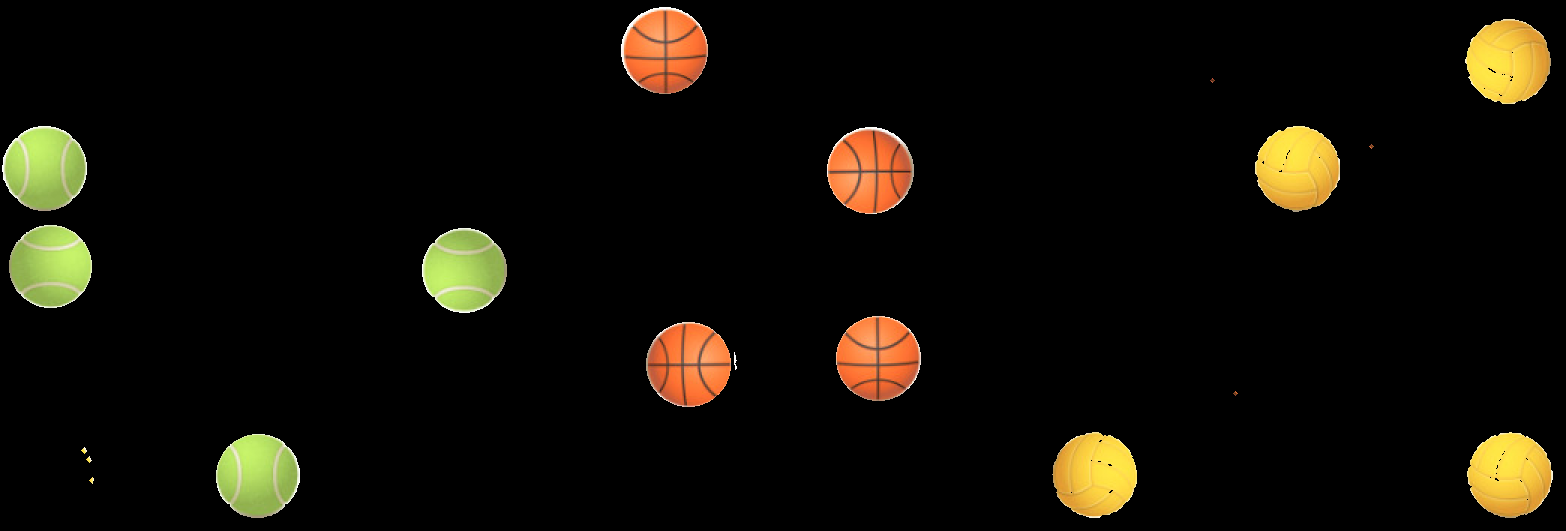

In [98]:
#Identificar intervalo de cores usando HSV
kernel_plus = np.uint8([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]])

# Crie as dimensões da figura e defina o título:
fig = plt.figure(figsize=(20, 10))
plt.suptitle("Separação por cores:", fontsize=30, fontweight='bold')
fig.patch.set_facecolor('white')

#Conversão para HSI
hsv_img = cv2.cvtColor(img_out_res2, cv2.COLOR_BGR2HSV)

#Limiares para imagem
#verde -> tênis
lower_green = np.array([28,100,150])
upper_green = np.array([95,255,255])
#laranja -> basquete
lower_orange = np.array([6,150,0])
upper_orange = np.array([15,255,255])
#amarelo -> vôlei
lower_yellow = np.array([15,180,0])
upper_yellow = np.array([27,255,255])

#Máscaras da imagem 2
img_mask_tenis = cv2.inRange(hsv_img, lower_green, upper_green)
img_mask_vol = cv2.inRange(hsv_img, lower_yellow, upper_yellow)
img_mask_basq = cv2.inRange(hsv_img, lower_orange, upper_orange)

#Imagens separadas por cor
img_tenis = cv2.bitwise_and(img_out_res2,img_out_res2, mask= img_mask_tenis)
img_fut_am = cv2.bitwise_and(img_out_res2,img_out_res2, mask= img_mask_basq)
img_vol = cv2.bitwise_and(img_out_res2,img_out_res2, mask= img_mask_vol)
img_basq = cv2.bitwise_and(img_out_res2,img_out_res2, mask= img_mask_basq)


# Plot all the images:
show_img_with_matplotlib(img_tenis, "Tênis", 1)
show_img_with_matplotlib(img_basq, "Basquete", 2)
show_img_with_matplotlib(img_vol, "Vôlei", 3)
plt.show()

#Elaborando máscaras a partir da separação por cores
print('máscaras pela separação por cores')

#Tênis
_, im_tenis_bin = cv2.threshold(cv2.cvtColor(img_tenis, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_dil_tenis = cv2.dilate(im_tenis_bin, kernel_plus, iterations = 3)
mask_tenis = img_dil_tenis


img_out_tenis = cv2.bitwise_and(img_out_res2, img_out_res2, mask= mask_tenis)

#Basquete
_, im_basq_bin = cv2.threshold(cv2.cvtColor(img_basq, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_basq_1 = cv2.erode(im_basq_bin, kernel_plus, iterations = 1)
img_dil_basq = cv2.dilate(img_ero_basq_1, kernel_plus, iterations = 7)
mask_basq = img_dil_basq
img_out_basq = cv2.bitwise_and(img_out_res2, img_out_res2, mask= mask_basq)

#Vôlei
_, im_vol_bin = cv2.threshold(cv2.cvtColor(img_vol, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_dil_vol = cv2.dilate(im_vol_bin, kernel_plus, iterations = 2)
mask_vol = img_dil_vol
img_out_vol = cv2.bitwise_and(img_out_res2, img_out_res2, mask= mask_vol)

cv2_imshow(np.hstack([img_out_tenis,img_out_basq, img_out_vol]))

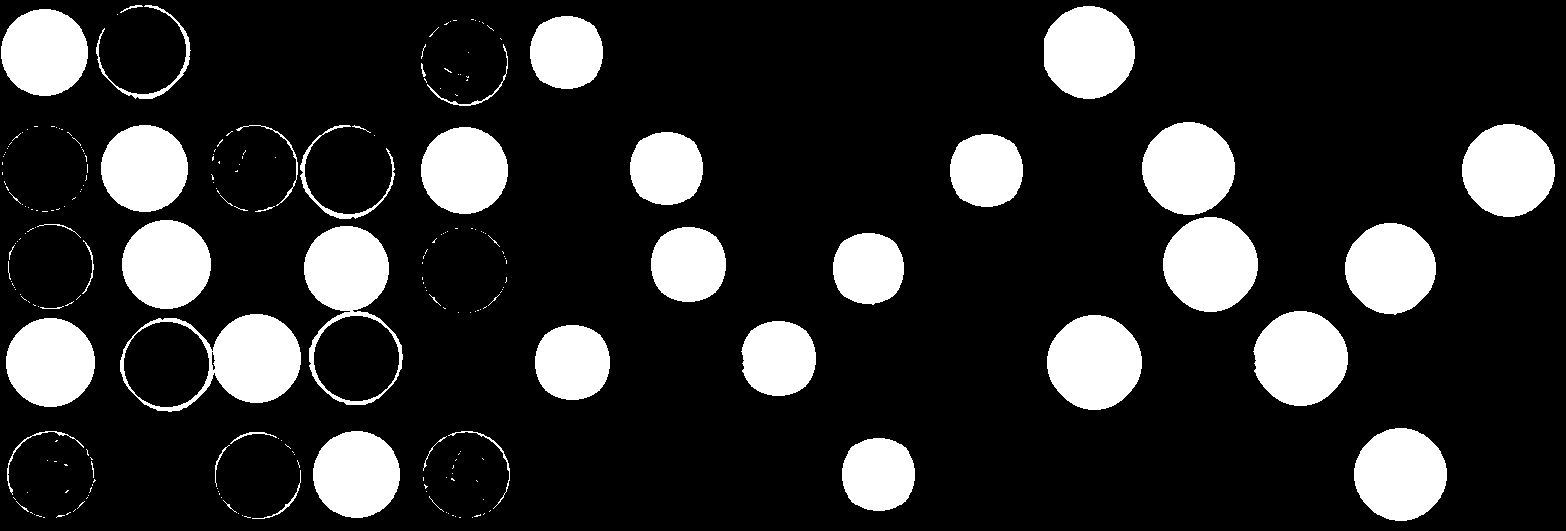

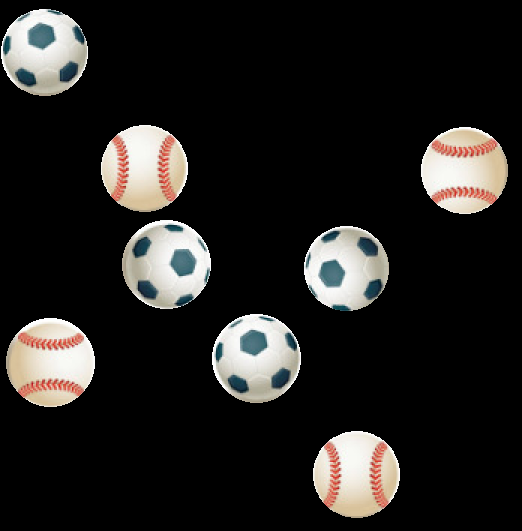

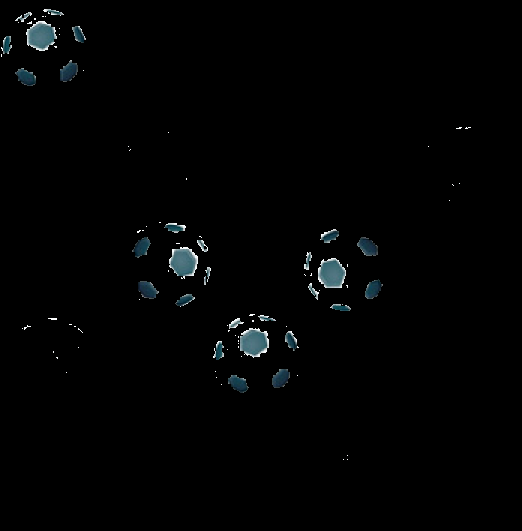

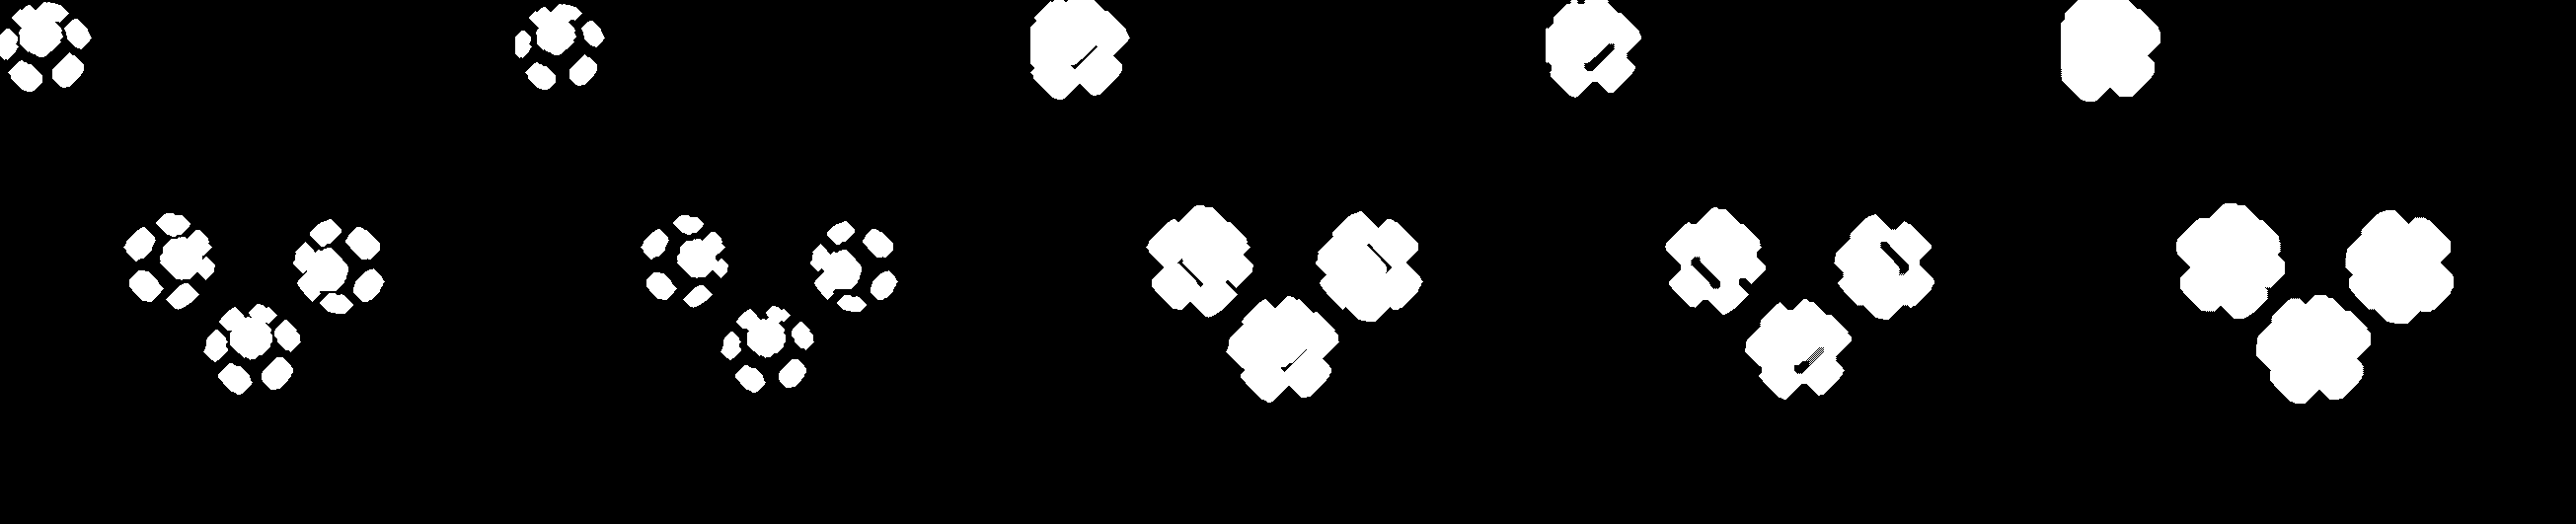

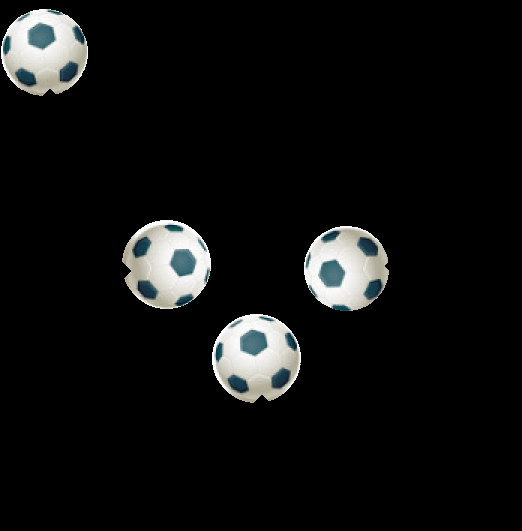

In [99]:
# Isolando Baseball e Futebol a partir da eliminação das demais
kernelx = np.uint8([[1, 0, 1],
                    [0, 1, 0],
                    [1, 0, 1]])

mask_bas_fut = cv2.bitwise_xor((mask_tenis + mask_basq + mask_vol), mask_circ_ok)

mask_bas_fut1 = cv2.erode(mask_bas_fut, kernel_plus, iterations= 7)
mask_bas_fut2 = cv2.dilate(mask_bas_fut1, kernel_plus, iterations= 10)

img_bas_fut = cv2.bitwise_and(img_out_res2, img_out_res2, mask= mask_bas_fut2)

cv2_imshow(np.hstack([mask_bas_fut, mask_bas_fut1, mask_bas_fut2]))
cv2_imshow(img_bas_fut)

#Separar futebol de baseball
#Identificar intervalo de cores usando HSV

#Conversão para HSI
hsv_img = cv2.cvtColor(img_bas_fut, cv2.COLOR_BGR2HSV)

#Limiares para imagem
#azul -> soccer
# hsl(194, 24%, 42%)
lower_blue = np.array([90,0,0])
upper_blue = np.array([115,255,255])

#Máscaras da imagem 2
img_mask_soc = cv2.inRange(hsv_img, lower_blue, upper_blue)

#Imagens separadas por cor
img_soc = cv2.bitwise_and(img_out_res2,img_out_res2, mask= img_mask_soc)

cv2_imshow(img_soc)
#Elaborar máscara
#Soccer
_, im_soc_bin = cv2.threshold(cv2.cvtColor(img_soc, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_soc_1 = cv2.erode(im_soc_bin, kernel_plus, iterations = 1)
img_dil_soc_1 = cv2.dilate(img_ero_soc_1, kernel_plus, iterations = 8)
img_ero_soc_2 = cv2.erode(img_dil_soc_1, kernel_plus, iterations = 2)
img_dil_soc_2 = cv2.dilate(img_ero_soc_2, kernel_plus, iterations = 10)
img_ero_soc_3 = cv2.erode(img_dil_soc_2, kernelx, iterations = 2)
img_dil_soc_3 = cv2.dilate(img_ero_soc_3, kernelx, iterations = 4)
mask_soc = img_dil_soc_3
imgsArray_soc = np.hstack([img_dil_soc_1, img_ero_soc_2, img_dil_soc_2, img_ero_soc_3, img_dil_soc_3])
img_out_soc = cv2.bitwise_and(img_bas_fut, img_bas_fut, mask= mask_soc)

cv2_imshow(imgsArray_soc)
cv2_imshow(img_out_soc)

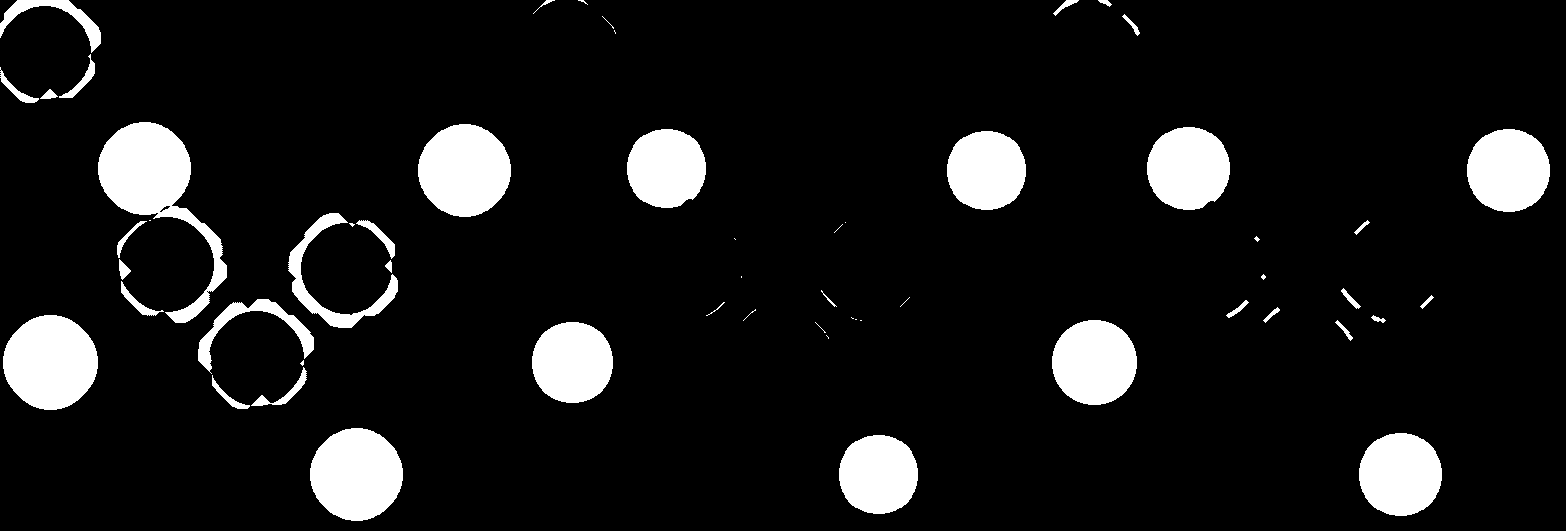

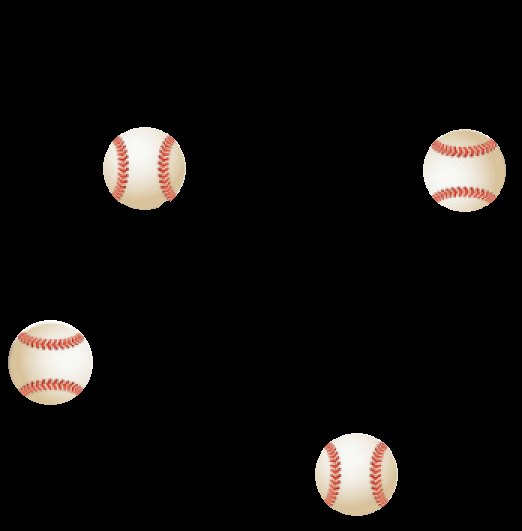

In [100]:
#Elaboração da máscara de baseball a partir do inverso da de futebol
mask_baseball = cv2.bitwise_xor(mask_bas_fut2, mask_soc)

mask_bas_ero_1 = cv2.erode(mask_baseball, kernel_plus, iterations= 7)
mask_bas_dil_1 = cv2.dilate(mask_bas_ero_1, kernel_plus, iterations= 2)

img_baseball = cv2.bitwise_and(img_bas_fut, img_bas_fut, mask= mask_bas_dil_1)

cv2_imshow(np.hstack([mask_baseball, mask_bas_ero_1, mask_bas_dil_1]))

cv2_imshow(img_baseball)

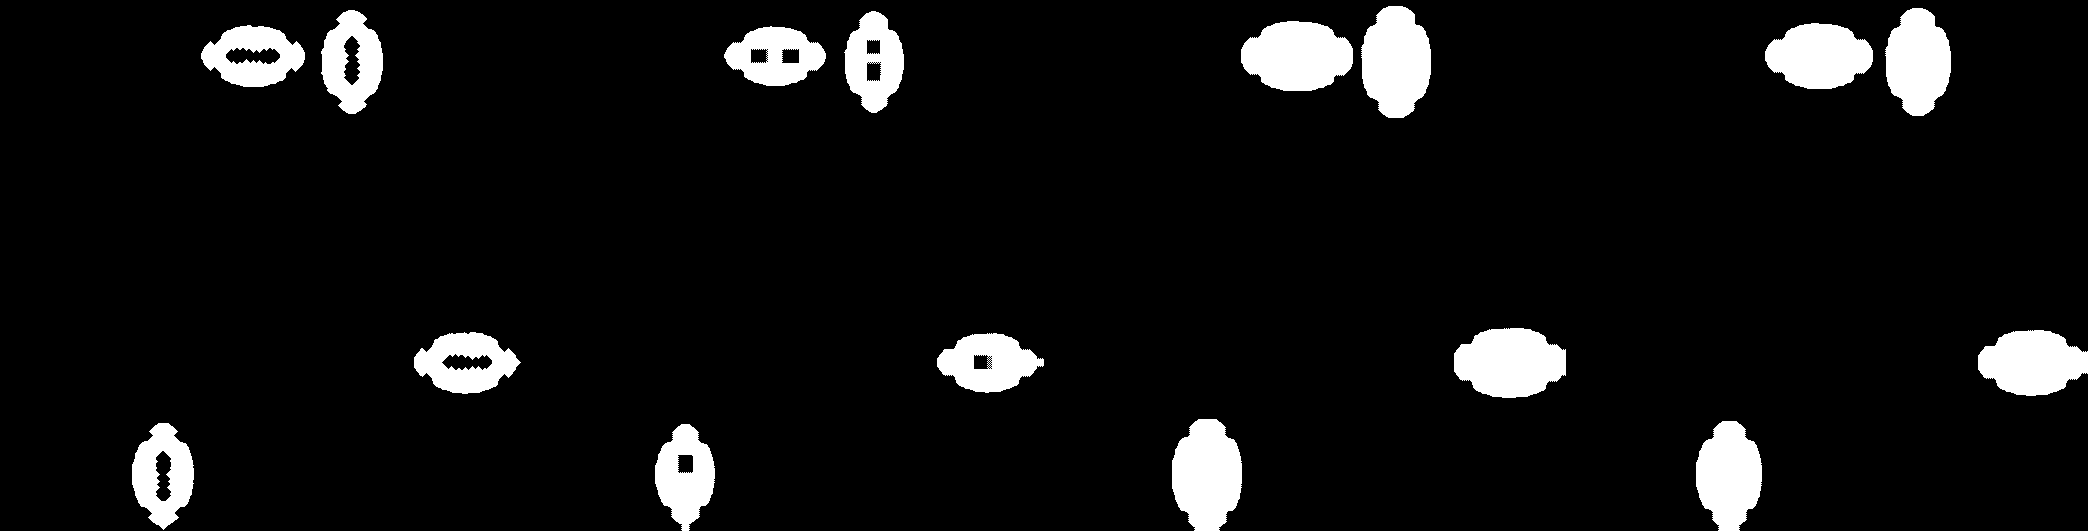

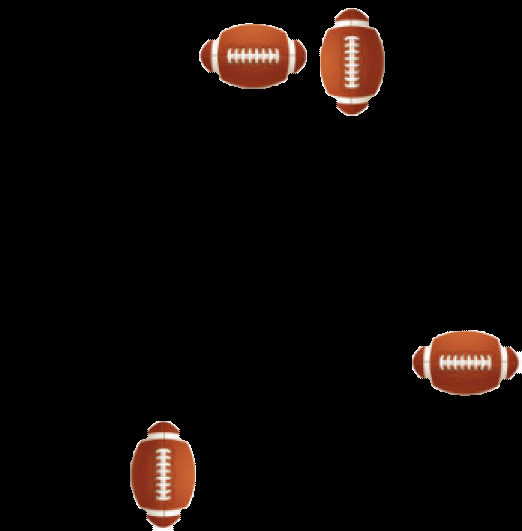

In [101]:
#Identificação da bola de Futebol Americano
img_fut_amm = cv2.bitwise_and(img1, img1, mask = cv2.bitwise_not(mask_circ_ok))

#Identificar intervalo de cores usando HSV
#Conversão para HSI
hsv_img = cv2.cvtColor(img_fut_amm, cv2.COLOR_BGR2HSV)

#Limiares para imagem 2
#laranja -> futebol americano
lower_fut = np.array([0,150,0])
upper_fut = np.array([10,255,255])

#Máscara da imagem
img_mask_fut_am = cv2.inRange(hsv_img, lower_fut, upper_fut)
#Fechamento da máscara
img_ero_futam_1 = cv2.erode(img_mask_fut_am, kernel_plus, iterations = 1)
img_dil_futam_1 = cv2.dilate(img_ero_futam_1, kernel_plus, iterations = 6)
img_ero_futam_2 = cv2.erode(img_dil_futam_1, kernel_plus, iterations = 5)
img_dil_futam_2 = cv2.dilate(img_ero_futam_2, kernelx, iterations = 5)
img_ero_futam_3 = cv2.erode(img_dil_futam_2, kernelx, iterations = 6)
img_dil_futam_3 = cv2.dilate(img_ero_futam_3, kernelx, iterations = 8)
img_ero_futam_4 = cv2.erode(img_dil_futam_3, kernelx, iterations = 3)
img_dil_futam_4 = cv2.dilate(img_ero_futam_4, kernelx, iterations = 3)
img_ero_futam_5 = cv2.erode(img_dil_futam_4, kernelx, iterations = 5)
mask_futam_ok = img_ero_futam_5
imgsArray_2 = np.hstack([img_ero_futam_2, img_ero_futam_3, img_ero_futam_4, img_ero_futam_5])
cv2_imshow(imgsArray_2)
img_out_futam = cv2.bitwise_and(img1, img1, mask= mask_futam_ok)

# Plot all the images:
#cv2_imshow(imgsArray_2)
cv2_imshow(img_out_futam)

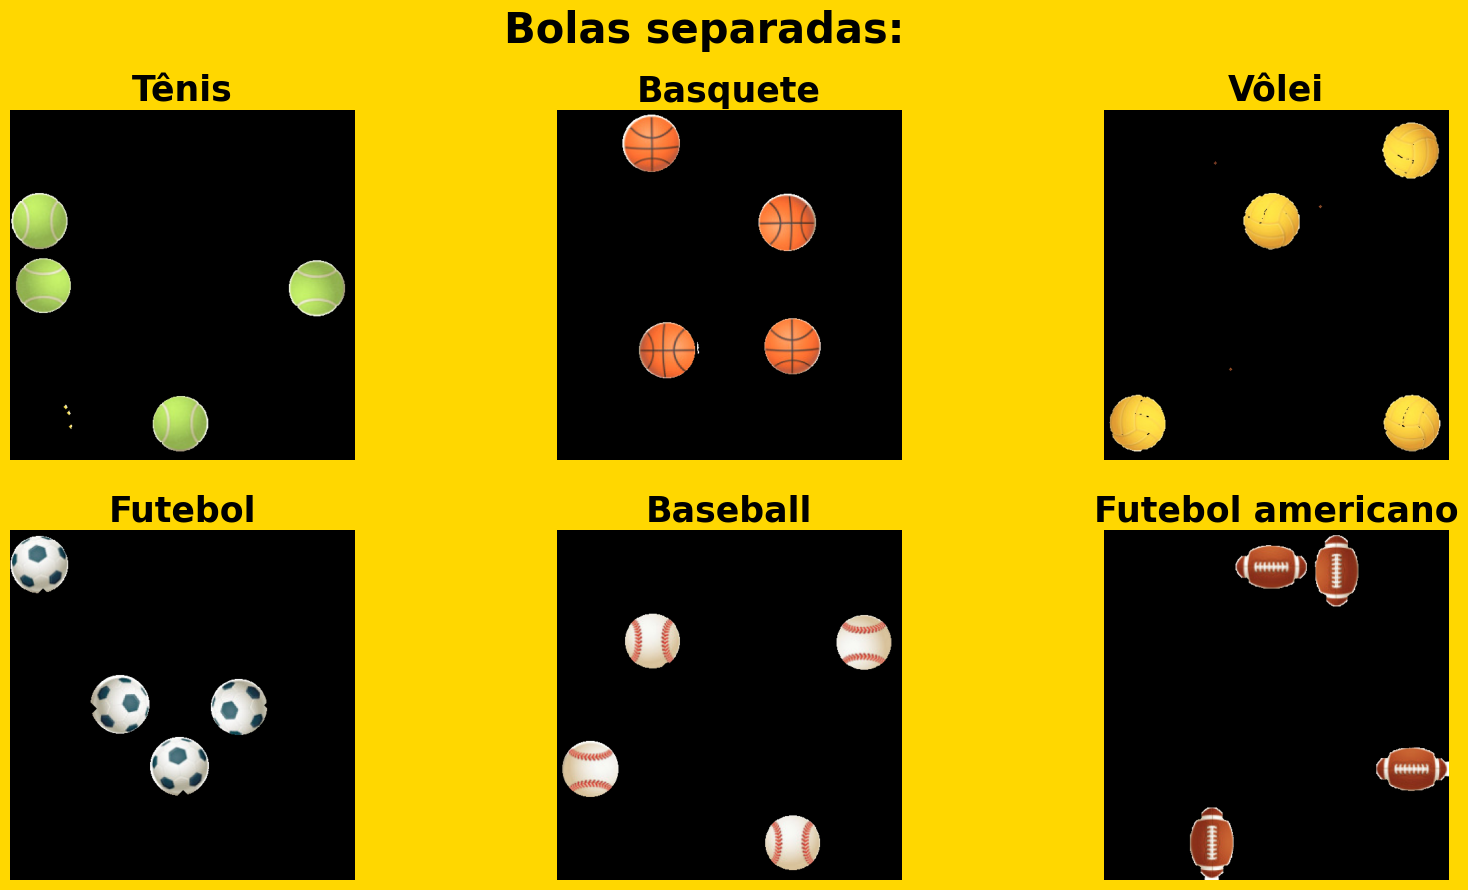

In [105]:
#Exibição das imagens

# Crie as dimensões da figura e defina o título:
fig = plt.figure(figsize=(20, 10))
plt.suptitle("Bolas separadas:", fontsize=30, fontweight='bold')
fig.patch.set_facecolor('gold')
show_img_with_matplotlib(img_out_tenis, "Tênis", 1)
show_img_with_matplotlib(img_out_basq, "Basquete", 2)
show_img_with_matplotlib(img_out_vol, "Vôlei", 3)
show_img_with_matplotlib(img_out_soc, "Futebol", 4)
show_img_with_matplotlib(img_baseball, "Baseball", 5)
show_img_with_matplotlib(img_out_futam, "Futebol americano", 6)
plt.show()